# Deep Learning for Computer Vision:  HW 2


## Computer Science: COMS W 4995 001


## Due: October 09, 2025

### Important Instructions:

1. As mentioned in class, please do not delete any lines of code that you've written while solving this assignment.

- If you write code that becomes irrelevant, either comment it out or move it to an additional section at the bottom
- Keep all code that is part of your final answer
- The notebook should run from top to bottom without errors

Example of Proper Code Management:

```
ANSWER SECTION CODE CELLS
relevant = "Do or do not. There is no try."
print(relevant)

ADITIONAL SECTION CODE CELLS
# not_relevant = "Only a Sith deals in absolutes."
# print(not_relevant)
```

2. We highly encourage that you comment your implementation as this allows the TAs to easily follow your thought process and grade the assignment effectively.

Example:
```
# In this code cell, I'm going to implement backpropagation using the approach
# discussed in lecture where we compute gradients layer by layer...
```

3. You're allowed to discuss general assignment details with up to 3 other students, but all code implementation must be done by yourself separately. Please list the names and UNIs of students you discussed with at the start of the notebook.

4. Before Submission:
- Verify all outputs are displayed correctly
- Download the notebook as .ipynb file from Colab/Jupyter
- Convert to PDF
- Submit both the .ipynb file and the .PDF file.

#### Problem

You are given the noisy XOR data generated for you below. Your task is to implement a multi-layer perceptron binary classifier with one hidden layer. For the activation function of the hidden units use ReLU. For the loss function use a softplus on a linear output layer as we did in class. Randomly initialize the weight parameters for your network.

a) Implement each layer of the network as a separate function with both forward propagation and backpropagation.

b) Train the network using stochastic gradient descent with mini-batches.  

c) Show the decision regions of the trained classifier by densely generating points in the plane and color coding these points according to the label your classifier would assign them. For instance, if a sample point $x$ is classified as class = 1, then color the point blue, otherwise color the point orange.

d) Repeat (b) and (c) varying the number of hidden units: 3, 16, 512. Discuss how the number of hidden units effects your solution.

e) Try at least two different learning schedules. For instance, you can start with a constant learning rate and see how that converges. Then, you can repeat everything by using a learning schedule that decays with time.

f) Try choosing your own loss function (**without asking me or the TAs what you should choose**), repeating (d).

g) Now try with three input features, generating your own training and testing data. (For this XOR the output should be a 1 if and only if exactly one of the inputs is 1. But make the training data noisy as before.) Use softplus loss. Do not try to show the decision regions, instead generate a test set in the same manner as the training set, classify the samples, and compute the classification accuracy.

h) Using your data from HW1 or any new data you curate if you don't think your HW1 data is appropriate for this assignment, train your MLP using your training set (80%). Compute the error rate on your test set (20%). It's up to you how many hidden units to use.

If you are struggling to get the network to converge, experiment with different learning rates.

Grading: a-d = 50%, e=10%, f=10%, g=10%, h=20%.

#### NOTE:  Do not to use keras, tensorflow, pytorch, sklearn, etc. to do this.  You must build the machine learning components from scratch.

Let's start by importing some libraries.

In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

Let's make up some noisy XOR data.

In [ ]:
data = pd.DataFrame(np.zeros((5000, 3)), columns=['x1', 'x2', 'y'])

# Let's make up some noisy XOR data to use to build our binary classifier
for i in range(len(data.index)):
    x1 = 1.0 * random.randint(0,1)
    x2 = 1.0 * random.randint(0,1)
    y = 1.0 * np.logical_xor(x1==1,x2==1)
    x1 = x1 + 0.15 * np.random.normal()
    x2 = x2 + 0.15 * np.random.normal()
    data.iloc[i,0] = x1
    data.iloc[i,1] = x2
    data.iloc[i,2] = y

data.head()

x1        x2    y
0  0.992579  0.921723  0.0
1  0.013011  1.028492  1.0
2 -0.110246  0.856274  1.0
3  0.096066  0.165131  0.0
4  1.118482  0.707481  0.0

Let's message this data into a numpy format.

In [ ]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# The cost function is expecting numpy matrices so we need to convert X and y before we can use them.
X = np.matrix(X.values)
y = np.matrix(y.values)

Let's make a sloppy plotting function for our binary data.

In [ ]:
# Sloppy function for plotting our data
def plot_data(X, y_prob):

    fig, ax = plt.subplots(figsize=(12,8))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    y_predict = y_prob > 0.5
    indices_0 = [k for k in range(0, X.shape[0]) if not y_predict[k]]
    indices_1 = [k for k in range(0, X.shape[0]) if y_predict[k]]

    ax.plot(X[indices_0, 0], X[indices_0,1], marker='o', linestyle='', ms=5, label='0')
    ax.plot(X[indices_1, 0], X[indices_1,1], marker='o', linestyle='', ms=5, label='1')

    ax.legend()
    ax.legend(loc=2)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Noisy XOR')
    plt.show()

Now let's plot it.

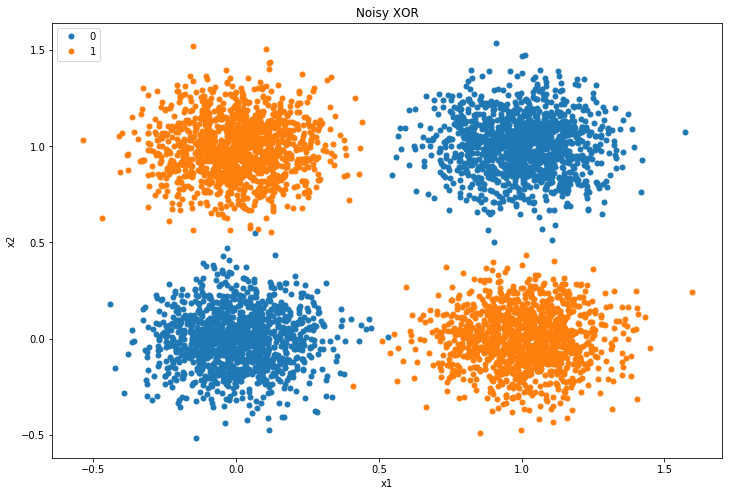

In [ ]:
plot_data(X, y)

Now let's create functions for forward and backward prop through the layers and we are off...

## Aditional Section